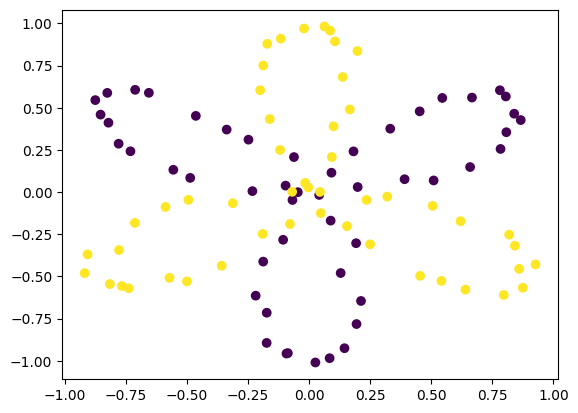

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

" Making dataset "
# r = sin(3t)

m_train = 100

t = np.linspace(0, 2 * np.pi, m_train)
r = []
for _t in t:
    if _t < np.pi:
        r.append(np.sin(3 * _t))
    else:
        r.append(-np.sin(3 * _t))

r = np.array(r)

X = np.random.uniform(-0.05, 0.05, (m_train, 2))  # two columns, one for each feature
X[:, 0] += r * np.cos(t)
X[:, 1] += r * np.sin(t)

Y = np.where(t < np.pi, 0, 1)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()